<p style="font-family: Arial; font-size:3.75vw;color:purple; font-style:bold"><br>
matplotlib Exercise Notebook
</p><br>

# Exercise Notebook Instructions

### 1. Important: Only modify the cells which instruct you to modify them - leave "do not modify" cells alone.  

The code which tests your responses assumes you have run the startup/read-only code exactly.

### 2. Work through the notebook in order.

Some of the steps depend on previous, so you'll want to move through the notebook in order.

### 3. It is okay to use numpy libraries.

You may find some of these questions are fairly straightforward to answer using built-in numpy functions.  That's totally okay - part of the point of these exercises is to familiarize you with the commonly used numpy functions.

### 4. Seek help if stuck

If you get stuck, don't worry!  You can either review the videos/notebooks from this week, ask in the course forums, or look to the solutions for the correct answer.  BUT, be careful about looking to the solutions too quickly.  Struggling to get the right answer is an important part of the learning process.

In [1]:
# DO NOT MODIFY

# import appropriate libraries

import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import pandas as pd 
%matplotlib inline

In [9]:
# DO NOT MODIFY

# we will use this dataset for some portions of this exercise.
# source: https://www.kaggle.com/hugomathien/soccer

# below function returns a SQL query in a dataframe, stored in the variable assigned to it (in this case 'soccerdf')
def get_data():
    cnx = sqlite3.connect('./soccer_database.sqlite')
    # pandas method .read_sql_query() reads a SQL query into a DataFrame. Arguments: (string SQL query, database connection)
    df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)
    return df

soccerdf = get_data()

In [10]:
#DO NOT MODIFY

# Let's see what is in our dataset. remember pandas method .describe() is used to view some basic statistical details like 
# percentile, mean, std etc. of a Dataframe or series of numeric values.
soccerdf.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


<p style="font-family: Arial; font-size:2.75vw;color:purple; font-style:bold">
<br>
Exercise 1: Line Plot
<br>
<br>
</p>

In the cell below, modify the function to plot x vs y, where x and y 
are column names of dataframe (df) which is also entered as input to the function. The function should

- First sort the dataframe by the column 'x'
- Take the first 50 rows for plotting (discard the remaining)
- Provide a title
- Label x and y axes

In [106]:
# modify this cell

def line_plot(df, x, y):
    ### BEGIN SOLUTION
    
# .inplace parameter in sort_values returns a new series ordered by values instead of the original
# (can use instead of using df = df.sort_value(..))
    df.sort_values(by=x, ascending=True, inplace=True)
    
# alternatively can use plt.plot(df[:50][x].values, df[:50][y].values). Remmber .values() returns
# a numpy array - idexing is removed
    plt.plot(df[x][:50], df[y][:50])
    
    plt.ylabel(y)
    plt.xlabel(x)

# alternatively can use string formatting: plt.title('Line Plot of %s and %s' % (y, x))
    plt.title(x + " vs " + y)
    
    plt.show()
    ### END SOLUTION

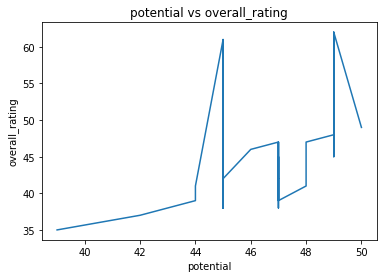

In [107]:
# DO NOT MODIFY

# your function should give a plot similar to the following:
# based on the line graph it is hard to determine a correlation or relationship between player
# overall rating and potential
line_plot(soccerdf, 'potential', 'overall_rating')

Your solution to Exercise 1 should look like this:
![plot1.png](attachment:plot1.png)

<p style="font-family: Arial; font-size:2.75vw;color:purple; font-style:bold"><br>
Exercise 2: Histogram <br><br></p>


In the cell below, modify the function to plot a histogram. The function should take an input parameter X which is a column name of the dataframe df, also passed to the function. Be sure to drop NULL values before you plot the histogram.

In [150]:
# modify this cell

def plot_histogram(df, x):
    ### BEGIN SOLUTION
    
# subset argumentcan be used to trop na in a specifi ccolumn
# as above, if not setting df = df.dropna(), must set inplace=True to make the df mutable 
    df.dropna(subset=[x], inplace=True)
    s = df[x].values
    print(type(s))
    print(s)
    
    plt.hist(s, facecolor='green', density=False)
    
    plt.xlabel(x)
    plt.ylabel('Number of players')
    plt.title('Histogram of %s' % x)
    
    plt.grid(True)
    plt.show()
    ### END SOLUTION

<class 'numpy.ndarray'>
[35. 35. 37. ... 94. 94. 94.]


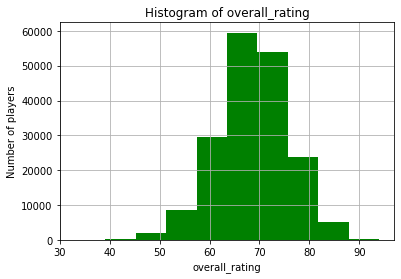

In [151]:
# DO NOT MODIFY

# your plot should look similar to the following:
# we can see that most players have an overall rating between 65 and 75
plot_histogram(soccerdf, 'overall_rating')

Your solution for Exercise 2 should look like this:
![plot2.png](attachment:plot2.png)

<p style="font-family: Arial; font-size:2.75vw;color:purple; font-style:bold"><br>
Exercise 3: Scatter Plot<br><br></p>

In the cell below, modify the function to plot...

In [154]:
# modify this cell

def plot_scatter(df, x, y):
    ### BEGIN SOLUTION
    
# alternatively, can use fig, axis = plt.subplots() then use methods on axis

    plt.scatter(df[x], df[y])
    plt.grid(True, axis='y')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('Scatter Plot: %s vs %s' % (x, y))
    plt.show()
    
    ### END SOLUTION

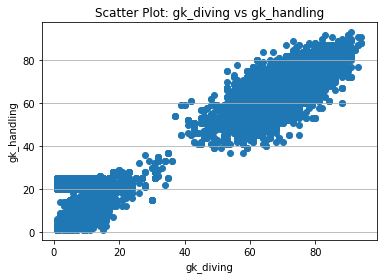

In [155]:
# DO NOT MODIFY

# your plot should look similar to the following:
# we can see that goal keeper diving appears to be positively correlated with goalkeeper handling
plot_scatter(df, 'gk_diving', 'gk_handling')

Your solution to Excercise 3 should look like this:
![plot3.png](attachment:plot3.png)